<a href="https://colab.research.google.com/github/jinsusong/study-NLP-IEEE-Paper/blob/main/Combining_Adversarial_Training_and_Relational_Graph_Attention_Network_for_Aspect_Based_Sentiment_Analysis_with_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처 : https://ieeexplore.ieee.org/document/9624384

# Combining Adversarial Training and Relational Graph Attention Network for Aspect-Based Sentiment Analysis with BERT

- 측면 기반 감정 분석은 문장에 명시적으로 주어진 측면의 감정 극성을 식별하는 것을 목표로 합니다. 

- 예를 들어 " 이 운영 체제는 Windows를 쉽게 능가하는 속도에서 멀티 터치 기능까지 "라는 문장을 가정합니다.” 

- 리뷰에는 운영 체제 와 Windows 의 두 가지 측면이 있으며 이 두 측면의 감정 양극성은 전자에 긍정적이고 후자에 부정적입니다. 일반적으로 관점 기반 감정 분석 작업은 개체 중심이며 텍스트에서보다 세분화된 의견 정보를 제공할 수 있습니다.

적대적 훈련 샘플

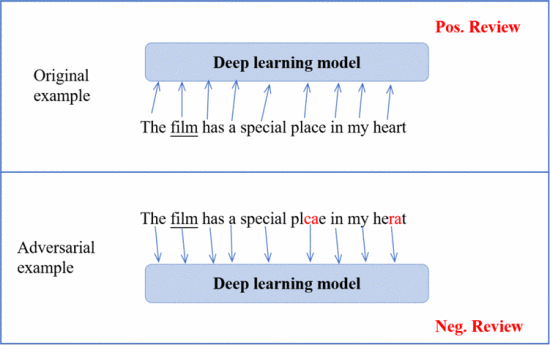

종속성 트리

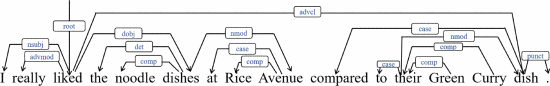

- 최근에는 pre-training 모델과 "pre-training + fine-tuning"의 패러다임이 제안되었습니다. 많은 사전 훈련 모델이 ABSA 작업에 적용되었습니다.

-  GNN
1. 측면 기반 감정 분석 작업의 경우 Zhang et al. ASGCN [20] 및 PWCN [21] 모델은 기능 또는 노드 거리의 종속성 트리를 사용하여 ABSA 작업을 해결하기 위해 제안한 모델입니다. 

2. Wang et al. 종속성 트리의 구문 특성과 노드 거리를 결합한 RGAT [22] 모델 제안. 

3. Bai et al. [23]종속성 트리 대상을 단어 벡터 표현에 추가합니다. 그래프 신경망과 적대적 훈련을 결합하는 것은 ABSA 작업에서 이전에 사용되지 않았기 때문에 의미 및 문법 정보를 사용하여 모델이 간섭에 더 잘 저항하여 더 많은 일반화 능력을 얻을 수 있도록 합니다. 

4. 본 논문에서는 측면 기반 감정 분석을 위해 적대적 훈련과 그래프 신경망을 결합한 BERT 기반 모델을 제안합니다.

#Propose

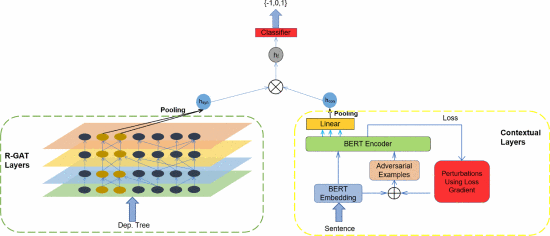

제안한 모델의 전체 아키텍처
- 모델은 크게 세 부분으로 나눌 수 있습니다. 
- 첫 번째 부분은 적대적 훈련과 결합된 BERT 인코더 모델이고, 
- 두 번째 부분은 R-GAT 인코더 모델을 포함하고, 
- 세 번째 부분은 기능 융합과 최종 감정 분류를 포함합니다.

A. BERT를 사용한 컨텍스트 인코더-적대적 훈련
- [9] , [10] 에서 영감을 받아 손실 기울기와 BERT의 컨텍스트 벡터를 통해 적대적 예제를 만들었습니다. 

- 구체적으로, 먼저 BERT 모델 [6] 의 구조에 따라 "[CLS] "+sentence+" [SEP] "+aspect target+" [SEP]"와 같은 문장 형식을 BERT 임베딩 모듈에 입력하여 문장의 원래 벡터를 가져온 다음 BERT 인코더에 입력하여 손실 값을 얻습니다. 

- [10] 과 같은 방식으로 손실 값의 기울기를 사용하여 adversarial 샘플을 생성합니다. 이는 [10] 의 adversarial의 일회성 설정과 다릅니다 . 

- 우리 작업에서 우리는 PGD의 아이디어에 따라 적대적 샘플을 생성합니다 [24]알고리즘은 "다단계"를 사용하여 적대적 크기를 결정하고 적대적 샘플을 BERT 인코더에 입력합니다. 

- 마지막으로 최적의 적대와 적대적 손실을 얻습니다.

B. 관계형 그래프 주의 네트워크 모델
- R-GAT은 단어가 더 많은 정보 표현을 얻을 수 있도록 관계형 기능을 주의 계산 및 집계 프로세스에 통합합니다 [23] .

- [23] , [25] 에서 영감을 받아 우리 모델에서 그래프 노드 기능과 구문 관계 기능을 모두 고려하여 주의를 계산한 다음 집계를 통해 추가 세분화된 정보를 도입하여 단어 기능을 풍부하게 합니다.

    1. 주의력 계산

    - 문장의 의미 의존성 트리를 입력으로 하고, 의존성 트리의 노드 간의 주의 가중치를 계산할 때 문법적 관계의 특성도 입력에 추가됩니다. 

    - R-GAT는 비정규화된 종속성 트리 노드 인식 주의를 모두 계산합니다.

    - 비정규화된 구문 관계 인식 attention에 따르면, 우리는 attention 메커니즘에 대해 스케일된 내적 주의 함수를 사용

    - 그런 다음 softmax 함수를 사용하여 두 가지 유형의 주의 점수를 결합하고 정규화합니다. 이와 같이 주의점수 결과를 통해 의존성 트리 노드의 특징과 구문 관계를 동시에 고려할 수 있다.
    
    2. 집계
    - 특징 집계 과정에서 관계가 상당히 중요하기 때문에 [23] 에서 이웃 단어의 숨겨진 특징 벡터와 해당 관계 벡터를 입력으로 사용하고 단어에 대한 추가 세분화된 정보를 추가 하는 집계 방법을 사용합니다. 

    - 단어 기능을 풍부하게 합니다. 컨텍스트 인코더와 유사하게 최대 풀링을 사용하여 구문 기능 표현을 얻습니다.

C. 특징 융합 및 분류
- 우리 모델에서 기능 융합은 구문 표현 사이의 게이팅 메커니즘 [26] 을 기반으로 합니다.GAT Encoder에서 얻은 컨텍스트 표현과 Contextual Encoder 에서 얻은 컨텍스트 표현

- 분류에 사용되는 분류기는 완전 연결 계층입니다. 본 논문에서는 분류기 함수로 Softmax 함수를 사용하고, 교차 엔트로피 손실로 손실 함수를 정의

# DataSet

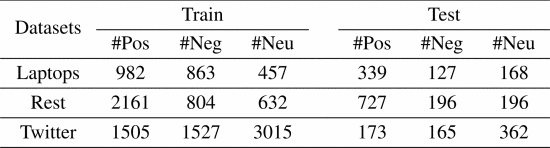

# Experiment

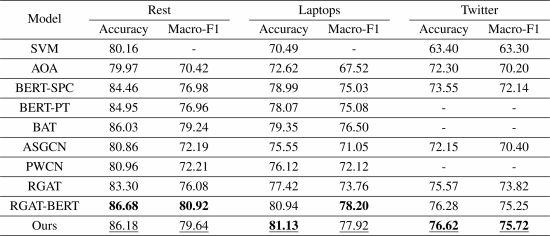

- SVM [1] 은 기존의 특징 추출과 함께 지원 벡터 머신(SVM)을 사용하는 기존의 기계 학습 모델입니다.

- AOA [29] 는 원래 기계 번역을 기반으로 제안된 모델이다. 이 모델은 측면과 맥락의 공동 관심에 적용됩니다.

- BERT-SPC [30] 는 감정 분석을 위해 사전 훈련된 BERT 모델과 풀링을 사용합니다.

- BERT-PT [15] 는 RRC와 세분화된 감성 분석에 적용되는 도메인 지식을 도입하여 BERT 사전 훈련을 위한 사후 훈련 방법입니다.

- BAT [10] 는 BERT-PT를 기반으로 한 측면 기반 감정 분석을 위한 적대적 훈련 아이디어를 소개합니다.

- ASGCN [20] 은 GC-N(graph convolution network) 모델로 문장의 의존성 트리에 단어 장거리 의존성 및 구문 정보를 이용하여 측면 수준 감정 분류를 구현한 모델입니다.

- PWCN [21] 은 종속성 트리에서 각 측면 단어의 근접성 값을 추가하는 데 사용되는 근접 가중 컨볼루션 네트워크입니다. 근접도 값은 종속성 트리에서 단어와 aspect 객체 단어의 최단 경로로 계산됩니다.

- RGAT [22] 는 ASGCN과 PWCN의 이념적 결합으로 이해될 수 있다. aspect의 구문 태그뿐만 아니라 종속성 트리에서 두 단어 사이의 거리도 고려합니다.

- RGAT-BERT [23] 는 RGAT와 유사한 종속성 구문 트리에서 단어 관계를 고려할 뿐만 아니라 이러한 종속성 태그를 단어 임베딩 정보를 풍부하게 하는 수단으로 추가하고 사전 학습 BERT를 기반으로 합니다.

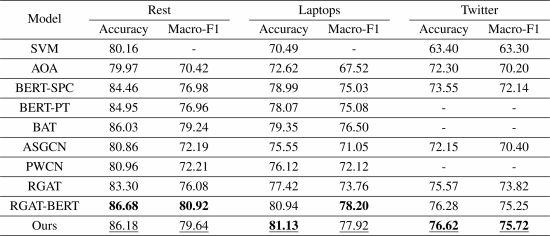

표 2 와 같이, 실험 결과는 우리 모델의 효율성을 입증했습니다. 'Twitter' 데이터셋에 대한 우리 모델의 성능은 모든 비교 모델에서 최고입니다. 그 이유는 'Twitter' 데이터셋의 문장이 더 길고 더 많은 구문 종속성 정보를 포함하기 때문입니다. 또한 'Twitter' 데이터셋의 문장에는 알려지지 않은 단어와 내용 측면이 더 많이 포함되어 있어 학습 모델을 적대적 훈련으로 일반화할 수 있습니다. 'Rest' 및 'Laptops' 데이터 세트에 대한 제안된 모델의 결과도 기준선 RGAT-BERT에 대해 매우 경쟁력이 있습니다. 'Rest' 데이터셋에 대한 실험 결과의 경우, 우리의 결과는 RGAT-BERT의 결과에 매우 가깝습니다. 우리는 'Rest' 데이터셋의 주석이 비교적 유사하기 때문에 발생할 수 있다고 생각합니다. 이로 인해 데이터셋이 민감하지 않습니다. 구문 의존성,

# Conclusion